# K-Means Clustering of Strait Time Stock Components

## Install Python Packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta
import yahoo_fin.stock_info as si

# Plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Machine learning
# Scaling the data
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sc

## Web Scraping of STI Component Stock

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Straits_Times_Index', match='List of STI constituents')
tickerlist = [df[0]['Stock Symbol'][i].split()[1]+'.SI' for i in range(30)]
stocklist = [df[0]['Company'][i] for i in range(30)]
stocklist

['Ascendas Real Estate Investment Trust',
 'CapitaLand Integrated Commercial Trust',
 'CapitaLand Investment',
 'City Developments Limited',
 'ComfortDelGro Corporation',
 'Dairy Farm International Holdings',
 'DBS Group Holdings',
 'Frasers Logistics & Commercial Trust',
 'Genting Singapore PLC',
 'Hongkong Land Holdings',
 'Jardine Cycle & Carriage',
 'Jardine Matheson Holdings Limited',
 'Keppel Corporation',
 'Keppel DC Reit',
 'Mapletree Commercial Trust',
 'Mapletree Industrial Trust',
 'Mapletree Logistics Trust',
 'Oversea-Chinese Banking Corp',
 'SATS',
 'Sembcorp Industries',
 'Singapore Airlines',
 'Singtel',
 'Singapore Exchange',
 'Singapore Technologies Engineering',
 'Thai Beverages',
 'United Overseas Bank',
 'UOL Group',
 'Venture Corporation',
 'Wilmar International',
 'Yangzijiang Shipbuilding Holdings\xa0[zh]']

## Download Financial Fundamental Ratio

In [33]:
sdata = []
for i, ticker in enumerate(tickerlist):
    d = si.get_quote_table(f"{ticker}")
    s = stocklist[i]
    data.append([s,d['Beta (5Y Monthly)'],d['EPS (TTM)'],d['PE Ratio (TTM)']])

In [34]:
df = pd.DataFrame(data, columns=['stock','beta','eps','pe_ratio'])
df.set_index('stock',inplace=True)
df.dropna(inplace=True)
df

,beta,eps,pe_ratio
stock,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.30
CapitaLand Integrated Commercial Trust,0.72,0.167,13.29
City Developments Limited,1.19,0.090,88.71
ComfortDelGro Corporation,1.06,0.060,23.83
Dairy Farm International Holdings,0.25,0.076,38.16
DBS Group Holdings,1.14,2.530,11.93
Frasers Logistics & Commercial Trust,0.88,0.247,5.38
Genting Singapore PLC,1.15,0.015,51.67
Jardine Cycle & Carriage,0.67,2.320,13.81


## Scale the Data

In [35]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_values = scaler.fit_transform(df.values)

# Printing pre-processed data
print(df_values)

[[-1.01009372 -0.39663899 -0.35227698]
 [-0.17689459 -0.44582475 -0.32944183]
 [ 1.38951979 -0.50594068  1.41018138]
 [ 0.95625624 -0.52936247 -0.08632822]
 [-1.74330896 -0.51687084  0.2442048 ]
 [ 1.22287996  1.39903152 -0.36081133]
 [ 0.35635286 -0.38336665 -0.51189237]
 [ 1.25620792 -0.56449515  0.55582386]
 [-0.34353441  1.23507899 -0.31744761]
 [-1.24338948  4.11595907 -0.41639993]
 [ 0.38968083 -0.13899931 -0.35135435]
 [-1.80996489 -0.42864877 -0.38941293]
 [ 0.08972914 -0.49501051 -0.23233478]
 [-1.24338948 -0.4473862  -0.28653943]
 [-0.47684627 -0.44192112 -0.41201742]
 [ 0.25636896  0.23574932 -0.37811069]
 [ 1.15622403 -0.56215297  4.60502639]
 [ 0.48966472 -0.45987782 -0.20557845]
 [-1.67665303 -0.27172278 -0.05957188]
 [-0.6434861  -0.43411386 -0.11769772]
 [ 1.15622403 -0.54341554 -0.26808678]
 [ 0.58964862  1.24288626 -0.36219528]
 [ 0.35635286 -0.29514457 -0.17144105]
 [-0.24355052  0.30601469 -0.27985035]
 [-0.47684627 -0.25220463 -0.40578966]
 [ 1.42284775 -0.42162223

## Determine the Optimum K

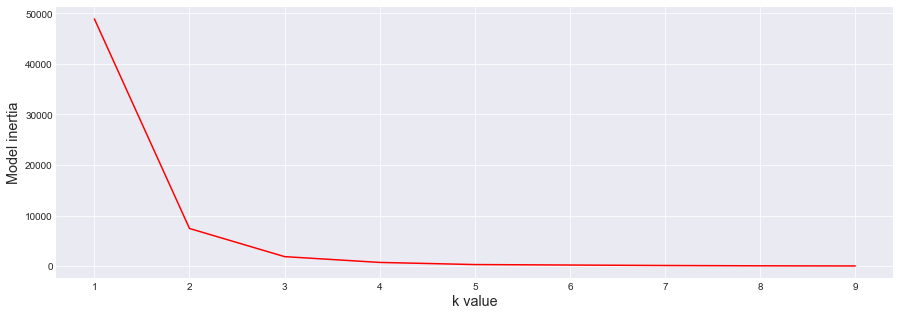

In [36]:
# Calculating inertia for k-means models with different values
# of 'k'
inertia = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

# Plotting the 'elbow curve'
plt.figure(figsize=(15,5))
plt.xlabel('k value',fontsize='x-large')
plt.ylabel('Model inertia',fontsize='x-large')
plt.plot(k_range,inertia,color='r')
plt.show()

## K-Means Clustering

In [37]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=5).fit(df_values)

## Assign the Clusters

In [38]:
clusters = km_model.labels_
df['cluster']=clusters
df

,beta,eps,pe_ratio,cluster
stock,,,,
Ascendas Real Estate Investment Trust,0.47,0.230,12.30,2
CapitaLand Integrated Commercial Trust,0.72,0.167,13.29,2
City Developments Limited,1.19,0.090,88.71,0
ComfortDelGro Corporation,1.06,0.060,23.83,0
Dairy Farm International Holdings,0.25,0.076,38.16,2
DBS Group Holdings,1.14,2.530,11.93,1
Frasers Logistics & Commercial Trust,0.88,0.247,5.38,0
Genting Singapore PLC,1.15,0.015,51.67,0
Jardine Cycle & Carriage,0.67,2.320,13.81,1


## Visualize the Clusters

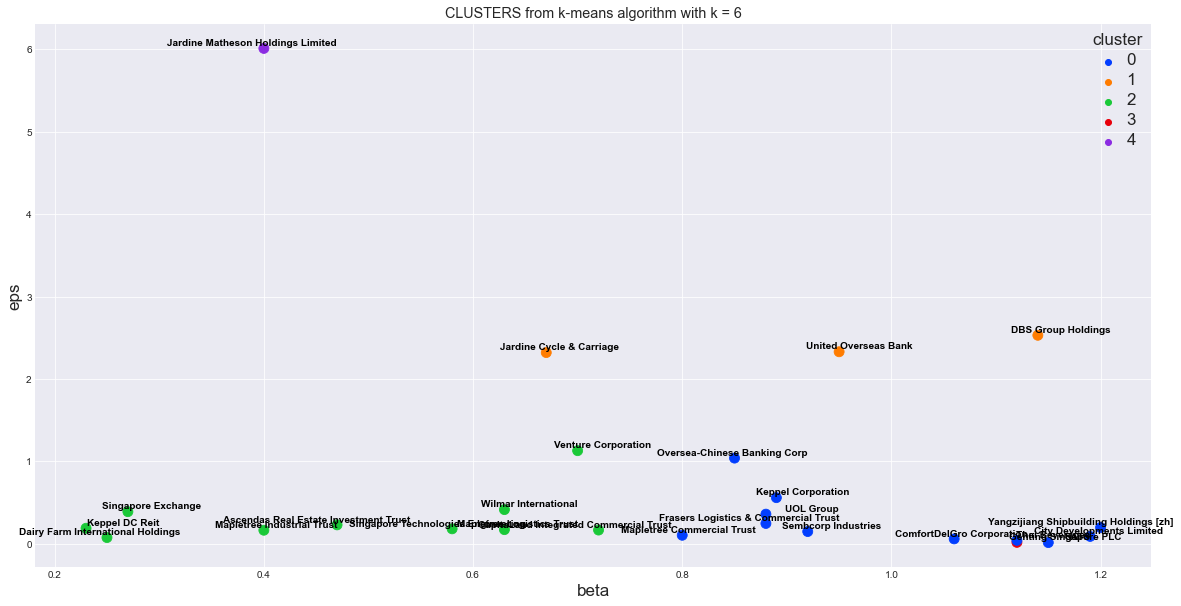

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Set graph size
plt.figure(figsize=(20, 10))

# Set x and y axis labels
ax = sns.scatterplot(y="eps", x="beta", edgecolor='face',hue="cluster", data=df, palette='bright', s=100)

# Plot the graph
plt.xlabel('beta', size=17)
plt.ylabel('eps', size=17)
plt.setp(ax.get_legend().get_texts(), fontsize='17')  
plt.setp(ax.get_legend().get_title(), fontsize='17')  
plt.title('CLUSTERS from k-means algorithm with k = 6', fontsize='x-large')

# Label individual elements
for i in range(0, df.shape[0]):
    plt.text(df.beta[i]+0.07, df['eps'][i]+0.01, df.index[i], 
             horizontalalignment='right',
             verticalalignment='bottom', size='medium', 
             color='black', weight='semibold')